In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic

import scipy.stats as stats
import matplotlib.pyplot as plt
from itertools import combinations

import numpy as np
from scipy.stats import pointbiserialr

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

# Read in the data

df = pd.read_csv(r'C:\Users\nguye\Downloads\IBM Employee.csv')


In [3]:
# Now let's take a look at the data

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [6]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Age - 0%
Attrition - 0%
BusinessTravel - 0%
Department - 0%
DistanceFromHome - 0%
Education - 0%
EducationField - 0%
EmployeeNumber - 0%
EnvironmentSatisfaction - 0%
Gender - 0%
JobInvolvement - 0%
JobLevel - 0%
JobRole - 0%
JobSatisfaction - 0%
MaritalStatus - 0%
MonthlyIncome - 0%
NumCompaniesWorked - 0%
OverTime - 0%
PercentSalaryHike - 0%
PerformanceRating - 0%
RelationshipSatisfaction - 0%
StockOptionLevel - 0%
TotalWorkingYears - 0%
TrainingTimesLastYear - 0%
WorkLifeBalance - 0%
YearsAtCompany - 0%
YearsInCurrentRole - 0%
YearsSinceLastPromotion - 0%
YearsWithCurrManager - 0%


In [8]:
# Data types for our columns

df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager

In [10]:
# Drop any duplicates

df.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,3,4,0,17,3,2,9,6,0,8


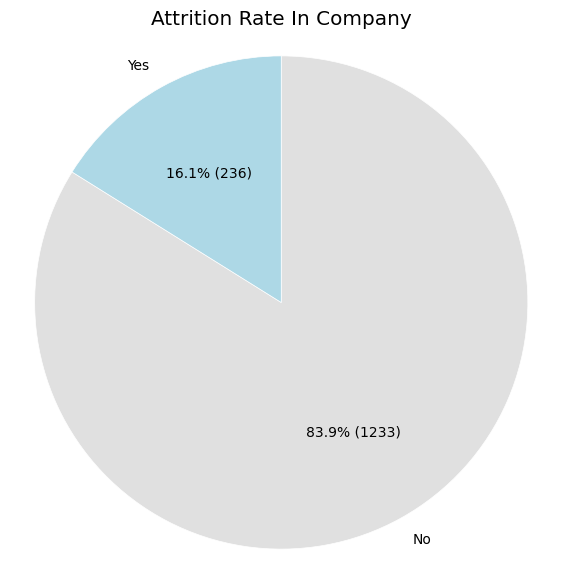

In [12]:
# Step 1: Calculate the proportions and counts of Attrition
attrition_counts = df['Attrition'].value_counts()
labels = attrition_counts.index
sizes = attrition_counts.values

# Step 2: Define the colors (use skyblue for both parts)
colors = ['#E0E0E0', 'lightblue']  # Adjust if more categories exist

# Step 3: Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, counterclock=False, 
        wedgeprops={'edgecolor': 'white'}, 
        autopct=lambda p: f'{p:.1f}% ({int(p * sum(sizes) / 100)})')

# Step 4: Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')  

# Step 5: Set title (optional)
plt.title('Attrition Rate In Company')

# Show the pie chart
plt.show()

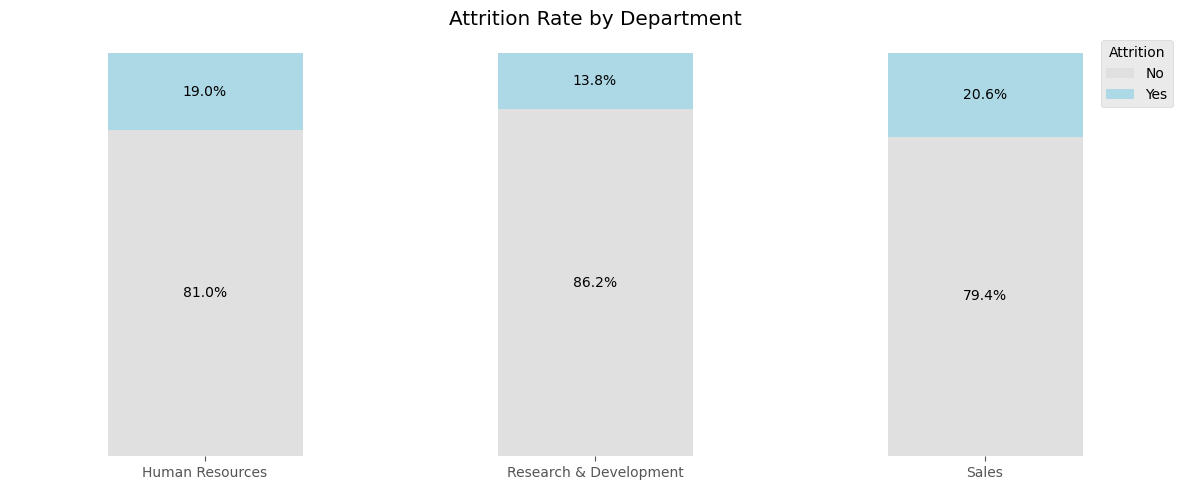

In [14]:
# Calculate counts
count_df = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)

# Calculate proportions
proportion_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot stacked bar chart
proportion_df.plot(kind='bar', stacked=True, ax=ax, color=['#E0E0E0', 'lightblue'])

# Set labels and title
ax.set_xlabel('Department')
ax.set_ylabel('Proportion (%)')
ax.set_title('Attrition Rate by Department')

# Customize x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Display percentages on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Set background color
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Remove y-axis
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')

# Remove chart borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


# Show the plot
plt.tight_layout()
plt.show()

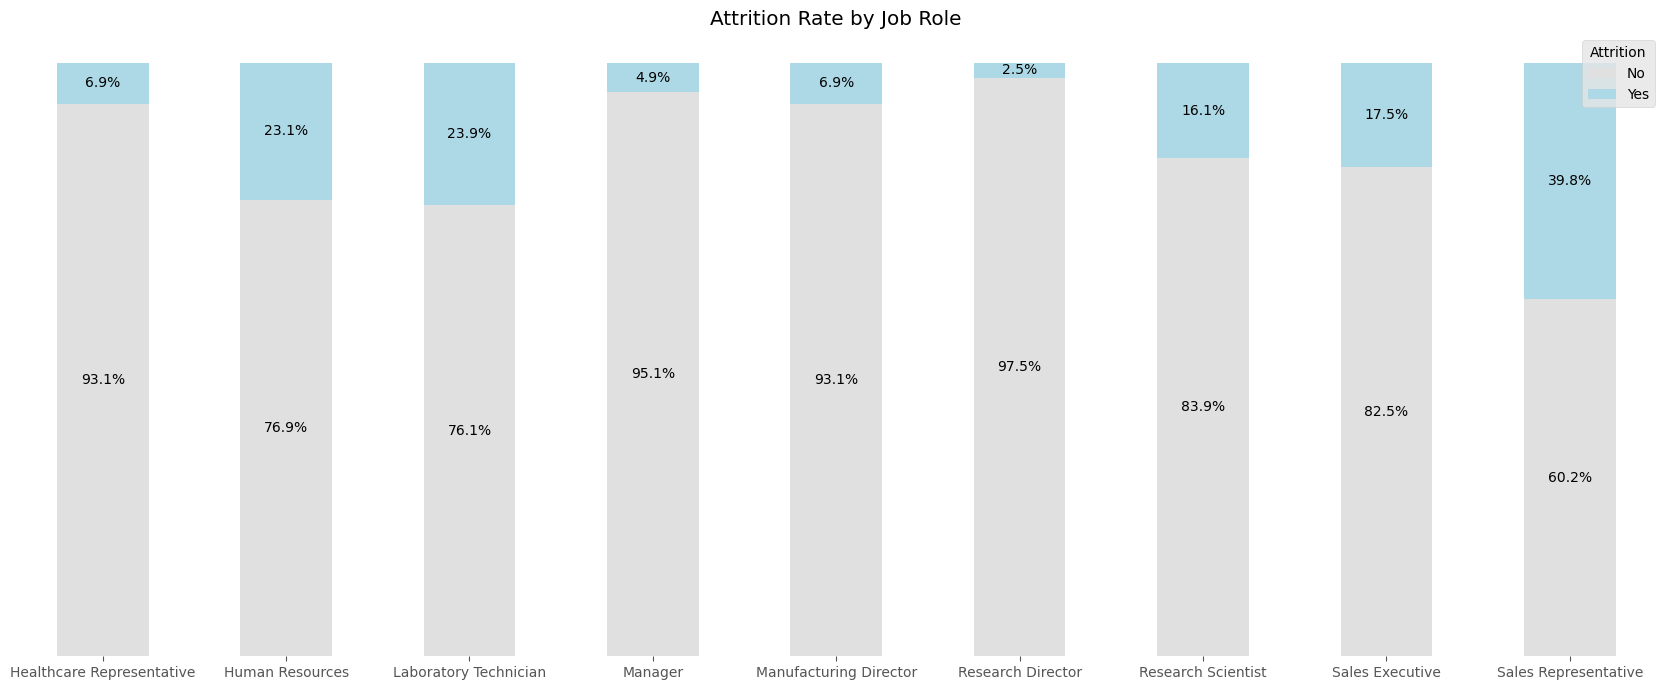

In [16]:
# Calculate counts
count_df = df.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)

# Calculate proportions
proportion_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(17, 7))

# Plot stacked bar chart
proportion_df.plot(kind='bar', stacked=True, ax=ax, color=['#E0E0E0', 'lightblue'])

# Set labels and title
ax.set_xlabel('Job Role')
ax.set_ylabel('Proportion (%)')
ax.set_title('Attrition Rate by Job Role')

# Customize x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Display percentages on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Set background color
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Remove y-axis
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')

# Remove chart borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

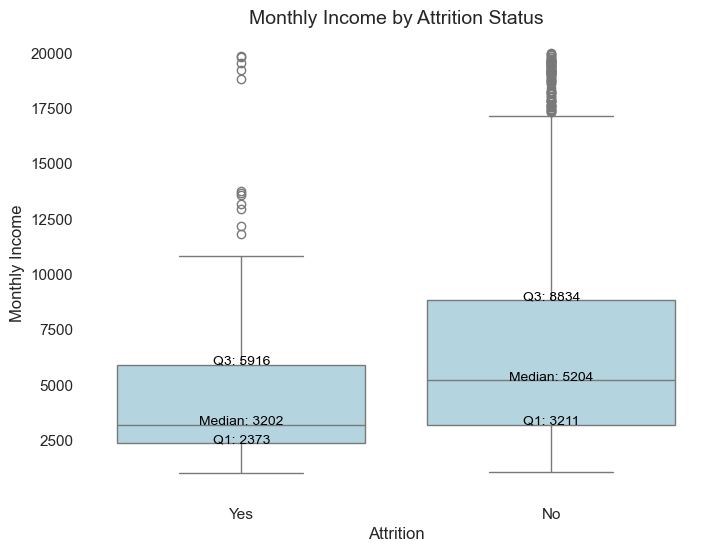

In [204]:
# Set white background and remove the border (spines)
sns.set(style="white")

# Create the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, color='lightblue')

# Set the title and labels
plt.title('Monthly Income by Attrition Status', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')

# Remove borders (spines)
sns.despine(left=True, bottom=True)

# Remove gridlines
ax.grid(False)

# Set white background
ax.set_facecolor('white')

# Calculate quartiles for the 'MonthlyIncome' by 'Attrition' groups
for attrition_category in df['Attrition'].unique():
    category_data = df[df['Attrition'] == attrition_category]['MonthlyIncome']
    q1 = category_data.quantile(0.25)
    q2 = category_data.median()
    q3 = category_data.quantile(0.75)
    
    # Find the x position of the category
    x_pos = df['Attrition'].unique().tolist().index(attrition_category)
    
    # Annotate quartile values on the plot
    ax.text(x=x_pos, y=q1, s=f'Q1: {q1:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q2, s=f'Median: {q2:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q3, s=f'Q3: {q3:.0f}', ha='center', color='black', fontsize=10)

# Show the plot
plt.show()

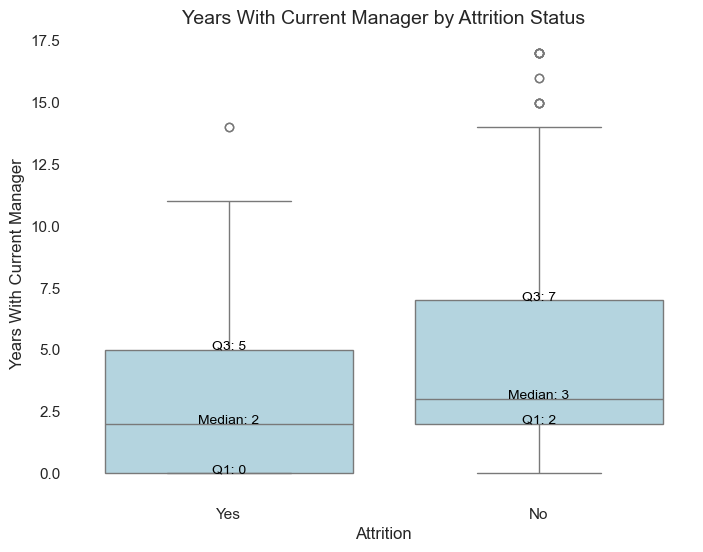

In [208]:
# Set white background and remove the border (spines)
sns.set(style="white")

# Create the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df, color='lightblue')

# Set the title and labels
plt.title('Years With Current Manager by Attrition Status', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Years With Current Manager')

# Remove borders (spines)
sns.despine(left=True, bottom=True)

# Remove gridlines
ax.grid(False)

# Set white background
ax.set_facecolor('white')

# Calculate quartiles for the 'MonthlyIncome' by 'Attrition' groups
for attrition_category in df['Attrition'].unique():
    category_data = df[df['Attrition'] == attrition_category]['YearsWithCurrManager']
    q1 = category_data.quantile(0.25)
    q2 = category_data.median()
    q3 = category_data.quantile(0.75)
    
    # Find the x position of the category
    x_pos = df['Attrition'].unique().tolist().index(attrition_category)
    
    # Annotate quartile values on the plot
    ax.text(x=x_pos, y=q1, s=f'Q1: {q1:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q2, s=f'Median: {q2:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q3, s=f'Q3: {q3:.0f}', ha='center', color='black', fontsize=10)

# Show the plot
plt.show()

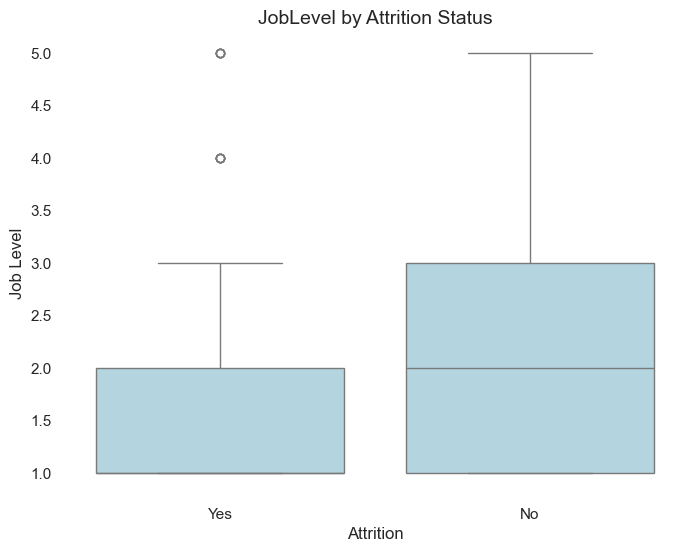

In [218]:
# Set white background and remove the border (spines)
sns.set(style="white")

# Create the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Attrition', y='JobLevel', data=df, color='lightblue')

# Set the title and labels
plt.title('JobLevel by Attrition Status', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Job Level')

# Remove borders (spines)
sns.despine(left=True, bottom=True)

# Remove gridlines
ax.grid(False)

# Set white background
ax.set_facecolor('white')

# Show the plot
plt.show()

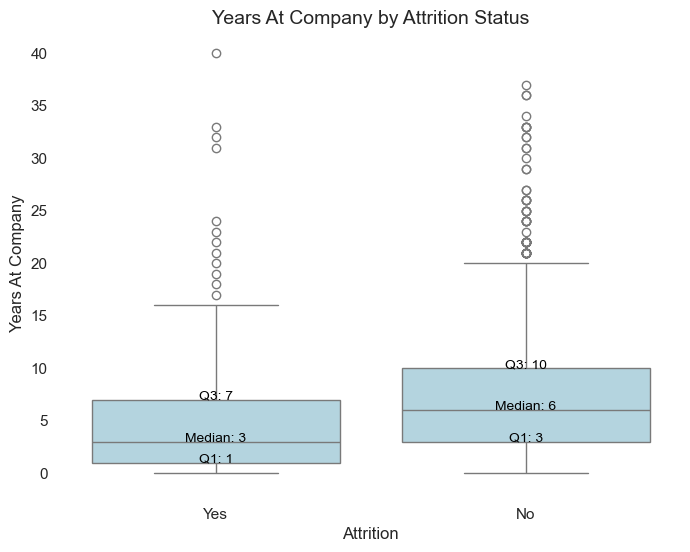

In [232]:
# Set white background and remove the border (spines)
sns.set(style="white")

# Create the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, color='lightblue')

# Set the title and labels
plt.title('Years At Company by Attrition Status', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Years At Company')

# Remove borders (spines)
sns.despine(left=True, bottom=True)

# Remove gridlines
ax.grid(False)

# Set white background
ax.set_facecolor('white')

# Calculate quartiles for the 'MonthlyIncome' by 'Attrition' groups
for attrition_category in df['Attrition'].unique():
    category_data = df[df['Attrition'] == attrition_category]['YearsAtCompany']
    q1 = category_data.quantile(0.25)
    q2 = category_data.median()
    q3 = category_data.quantile(0.75)
    
    # Find the x position of the category
    x_pos = df['Attrition'].unique().tolist().index(attrition_category)
    
    # Annotate quartile values on the plot
    ax.text(x=x_pos, y=q1, s=f'Q1: {q1:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q2, s=f'Median: {q2:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q3, s=f'Q3: {q3:.0f}', ha='center', color='black', fontsize=10)

# Show the plot
plt.show()

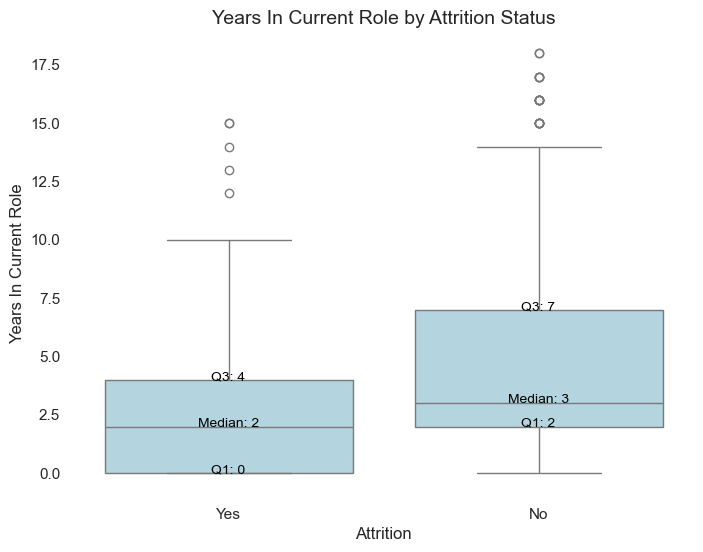

In [234]:
# Set white background and remove the border (spines)
sns.set(style="white")

# Create the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=df, color='lightblue')

# Set the title and labels
plt.title('Years In Current Role by Attrition Status', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Years In Current Role')

# Remove borders (spines)
sns.despine(left=True, bottom=True)

# Remove gridlines
ax.grid(False)

# Set white background
ax.set_facecolor('white')

# Calculate quartiles for the 'MonthlyIncome' by 'Attrition' groups
for attrition_category in df['Attrition'].unique():
    category_data = df[df['Attrition'] == attrition_category]['YearsInCurrentRole']
    q1 = category_data.quantile(0.25)
    q2 = category_data.median()
    q3 = category_data.quantile(0.75)
    
    # Find the x position of the category
    x_pos = df['Attrition'].unique().tolist().index(attrition_category)
    
    # Annotate quartile values on the plot
    ax.text(x=x_pos, y=q1, s=f'Q1: {q1:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q2, s=f'Median: {q2:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q3, s=f'Q3: {q3:.0f}', ha='center', color='black', fontsize=10)

# Show the plot
plt.show()

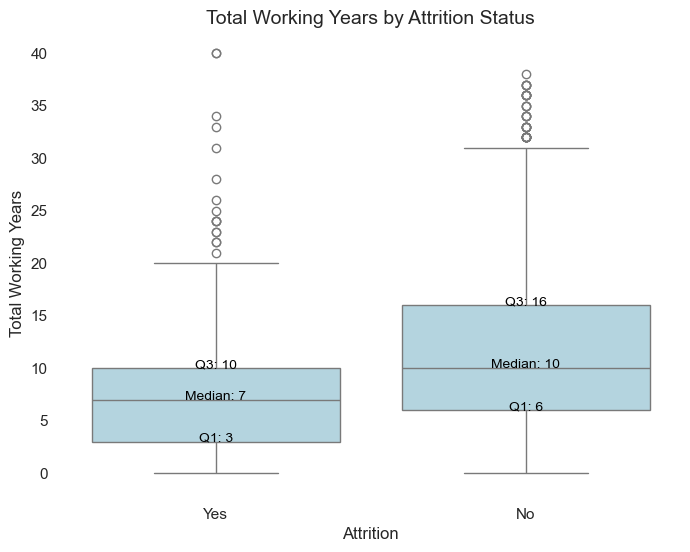

In [236]:
# Set white background and remove the border (spines)
sns.set(style="white")

# Create the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df, color='lightblue')

# Set the title and labels
plt.title('Total Working Years by Attrition Status', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')

# Remove borders (spines)
sns.despine(left=True, bottom=True)

# Remove gridlines
ax.grid(False)

# Set white background
ax.set_facecolor('white')

# Calculate quartiles for the 'MonthlyIncome' by 'Attrition' groups
for attrition_category in df['Attrition'].unique():
    category_data = df[df['Attrition'] == attrition_category]['TotalWorkingYears']
    q1 = category_data.quantile(0.25)
    q2 = category_data.median()
    q3 = category_data.quantile(0.75)
    
    # Find the x position of the category
    x_pos = df['Attrition'].unique().tolist().index(attrition_category)
    
    # Annotate quartile values on the plot
    ax.text(x=x_pos, y=q1, s=f'Q1: {q1:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q2, s=f'Median: {q2:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q3, s=f'Q3: {q3:.0f}', ha='center', color='black', fontsize=10)

# Show the plot
plt.show()

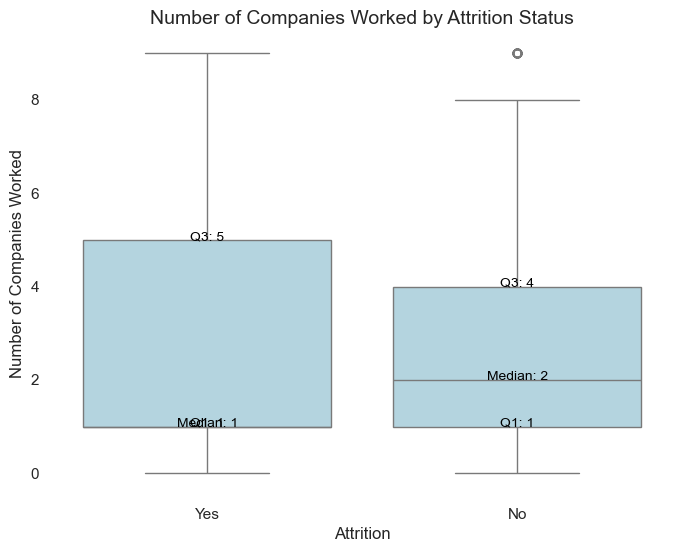

In [238]:
# Set white background and remove the border (spines)
sns.set(style="white")

# Create the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=df, color='lightblue')

# Set the title and labels
plt.title('Number of Companies Worked by Attrition Status', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Number of Companies Worked')

# Remove borders (spines)
sns.despine(left=True, bottom=True)

# Remove gridlines
ax.grid(False)

# Set white background
ax.set_facecolor('white')

# Calculate quartiles for the 'MonthlyIncome' by 'Attrition' groups
for attrition_category in df['Attrition'].unique():
    category_data = df[df['Attrition'] == attrition_category]['NumCompaniesWorked']
    q1 = category_data.quantile(0.25)
    q2 = category_data.median()
    q3 = category_data.quantile(0.75)
    
    # Find the x position of the category
    x_pos = df['Attrition'].unique().tolist().index(attrition_category)
    
    # Annotate quartile values on the plot
    ax.text(x=x_pos, y=q1, s=f'Q1: {q1:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q2, s=f'Median: {q2:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q3, s=f'Q3: {q3:.0f}', ha='center', color='black', fontsize=10)

# Show the plot
plt.show()

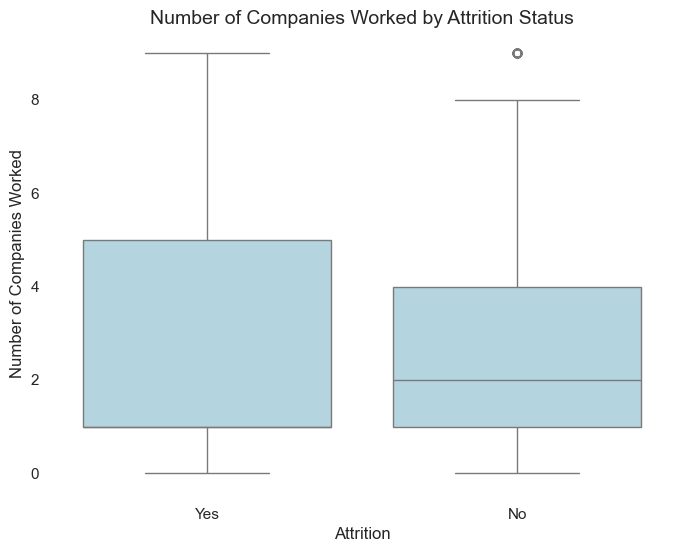

In [240]:
# Set white background and remove the border (spines)
sns.set(style="white")

# Create the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=df, color='lightblue')

# Set the title and labels
plt.title('Number of Companies Worked by Attrition Status', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Number of Companies Worked')

# Remove borders (spines)
sns.despine(left=True, bottom=True)

# Remove gridlines
ax.grid(False)

# Set white background
ax.set_facecolor('white')

# Show the plot
plt.show()

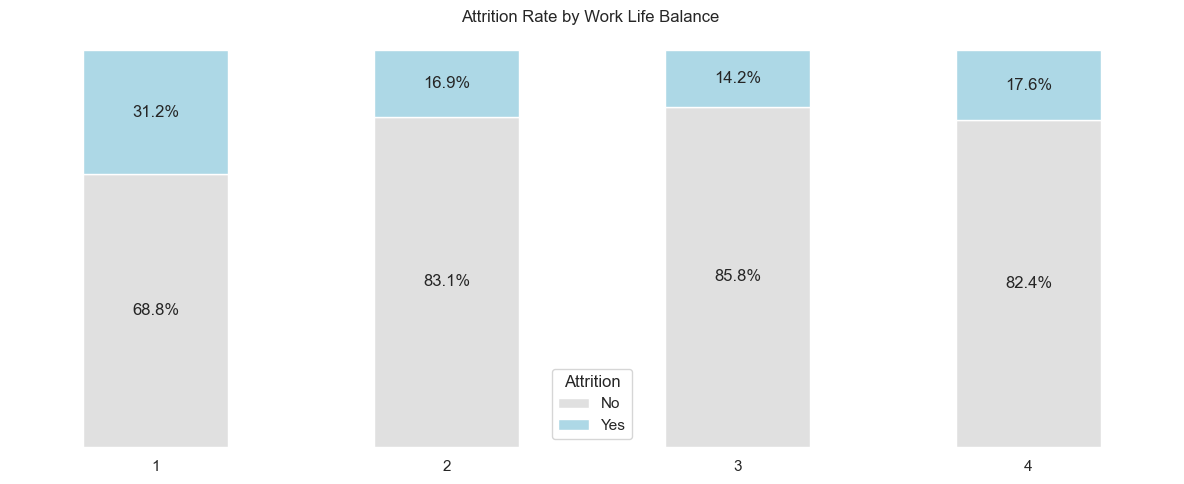

In [250]:
# Calculate counts
count_df = df.groupby(['WorkLifeBalance', 'Attrition']).size().unstack(fill_value=0)

# Calculate proportions
proportion_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot stacked bar chart
proportion_df.plot(kind='bar', stacked=True, ax=ax, color=['#E0E0E0', 'lightblue'])

# Set labels and title
ax.set_xlabel('Work Life Balance')
ax.set_ylabel('Proportion (%)')
ax.set_title('Attrition Rate by Work Life Balance ')

# Customize x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Display percentages on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Set background color
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Remove y-axis
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')


# Remove chart borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

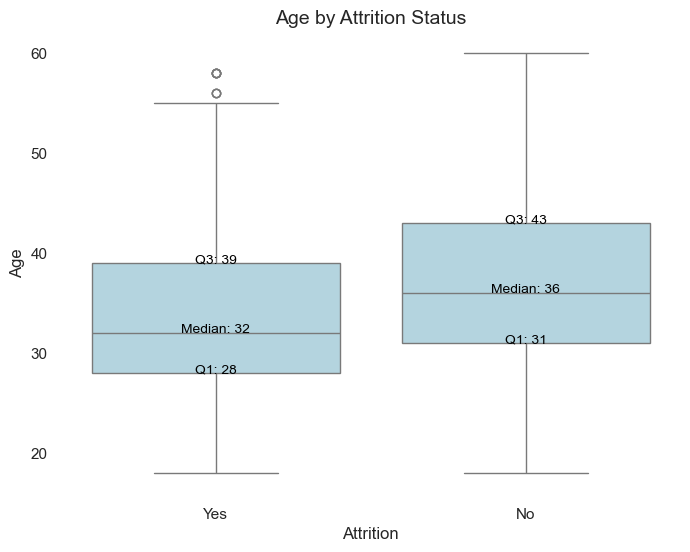

In [268]:
# Set white background and remove the border (spines)
sns.set(style="white")

# Create the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Attrition', y='Age', data=df, color='lightblue')

# Set the title and labels
plt.title('Age by Attrition Status', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Age')

# Remove borders (spines)
sns.despine(left=True, bottom=True)

# Remove gridlines
ax.grid(False)

# Set white background
ax.set_facecolor('white')

# Calculate quartiles for the 'MonthlyIncome' by 'Attrition' groups
for attrition_category in df['Attrition'].unique():
    category_data = df[df['Attrition'] == attrition_category]['Age']
    q1 = category_data.quantile(0.25)
    q2 = category_data.median()
    q3 = category_data.quantile(0.75)
    
    # Find the x position of the category
    x_pos = df['Attrition'].unique().tolist().index(attrition_category)
    
    # Annotate quartile values on the plot
    ax.text(x=x_pos, y=q1, s=f'Q1: {q1:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q2, s=f'Median: {q2:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q3, s=f'Q3: {q3:.0f}', ha='center', color='black', fontsize=10)

# Show the plot
plt.show()

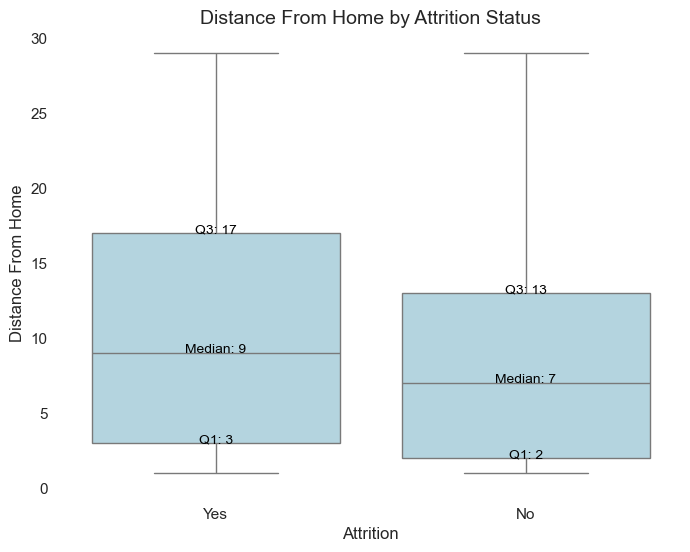

In [270]:
# Set white background and remove the border (spines)
sns.set(style="white")

# Create the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, color='lightblue')

# Set the title and labels
plt.title('Distance From Home by Attrition Status', fontsize=14)
plt.xlabel('Attrition')
plt.ylabel('Distance From Home')

# Remove borders (spines)
sns.despine(left=True, bottom=True)

# Remove gridlines
ax.grid(False)

# Set white background
ax.set_facecolor('white')

# Calculate quartiles for the 'MonthlyIncome' by 'Attrition' groups
for attrition_category in df['Attrition'].unique():
    category_data = df[df['Attrition'] == attrition_category]['DistanceFromHome']
    q1 = category_data.quantile(0.25)
    q2 = category_data.median()
    q3 = category_data.quantile(0.75)
    
    # Find the x position of the category
    x_pos = df['Attrition'].unique().tolist().index(attrition_category)
    
    # Annotate quartile values on the plot
    ax.text(x=x_pos, y=q1, s=f'Q1: {q1:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q2, s=f'Median: {q2:.0f}', ha='center', color='black', fontsize=10)
    ax.text(x=x_pos, y=q3, s=f'Q3: {q3:.0f}', ha='center', color='black', fontsize=10)

# Show the plot
plt.show()

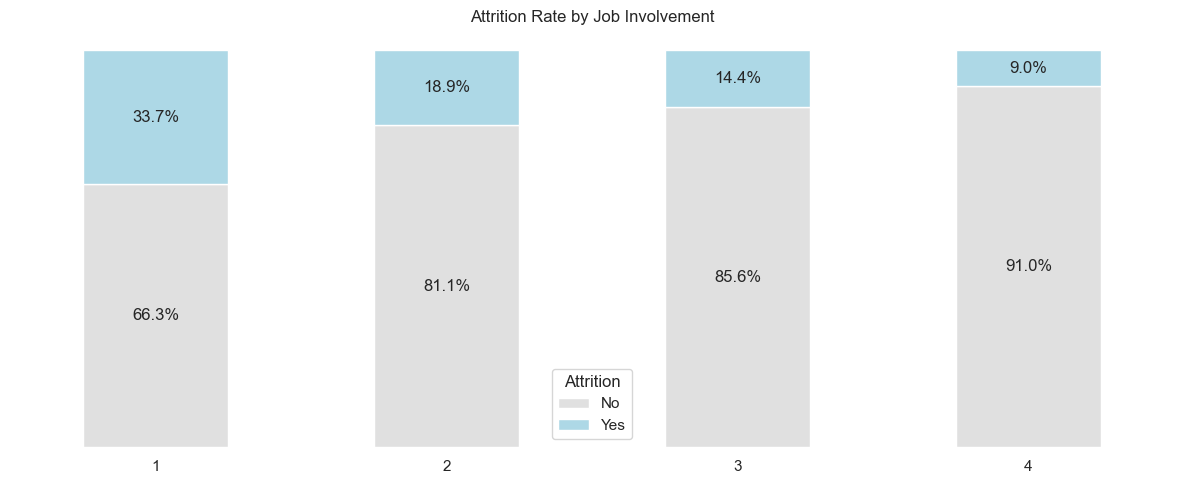

In [274]:
# Calculate counts
count_df = df.groupby(['JobInvolvement', 'Attrition']).size().unstack(fill_value=0)

# Calculate proportions
proportion_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot stacked bar chart
proportion_df.plot(kind='bar', stacked=True, ax=ax, color=['#E0E0E0', 'lightblue'])

# Set labels and title
ax.set_xlabel('Job Involvement')
ax.set_ylabel('Proportion (%)')
ax.set_title('Attrition Rate by Job Involvement')

# Customize x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Display percentages on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Set background color
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Remove y-axis
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')


# Remove chart borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

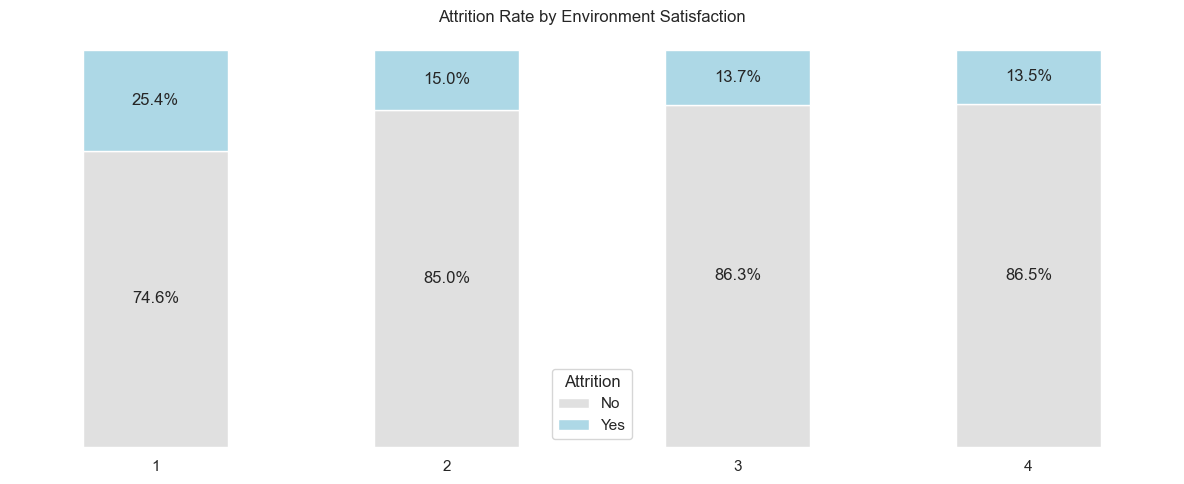

In [276]:
# Calculate counts
count_df = df.groupby(['EnvironmentSatisfaction', 'Attrition']).size().unstack(fill_value=0)

# Calculate proportions
proportion_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot stacked bar chart
proportion_df.plot(kind='bar', stacked=True, ax=ax, color=['#E0E0E0', 'lightblue'])

# Set labels and title
ax.set_xlabel('Environment Satisfaction')
ax.set_ylabel('Proportion (%)')
ax.set_title('Attrition Rate by Environment Satisfaction')

# Customize x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Display percentages on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Set background color
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Remove y-axis
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')


# Remove chart borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

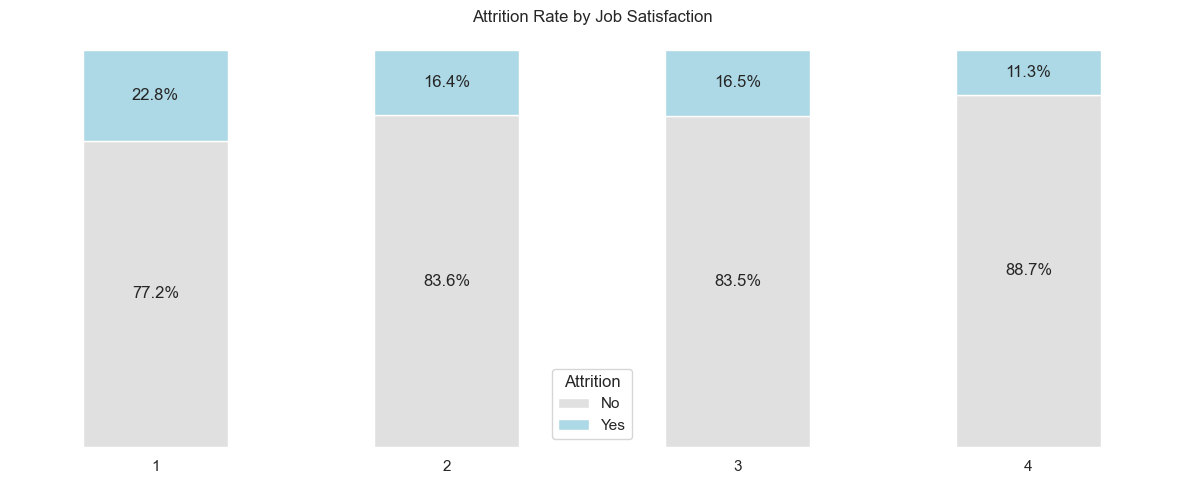

In [278]:
# Calculate counts
count_df = df.groupby(['JobSatisfaction', 'Attrition']).size().unstack(fill_value=0)

# Calculate proportions
proportion_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot stacked bar chart
proportion_df.plot(kind='bar', stacked=True, ax=ax, color=['#E0E0E0', 'lightblue'])

# Set labels and title
ax.set_xlabel('Job Satisfaction')
ax.set_ylabel('Proportion (%)')
ax.set_title('Attrition Rate by Job Satisfaction')

# Customize x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Display percentages on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Set background color
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Remove y-axis
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')


# Remove chart borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

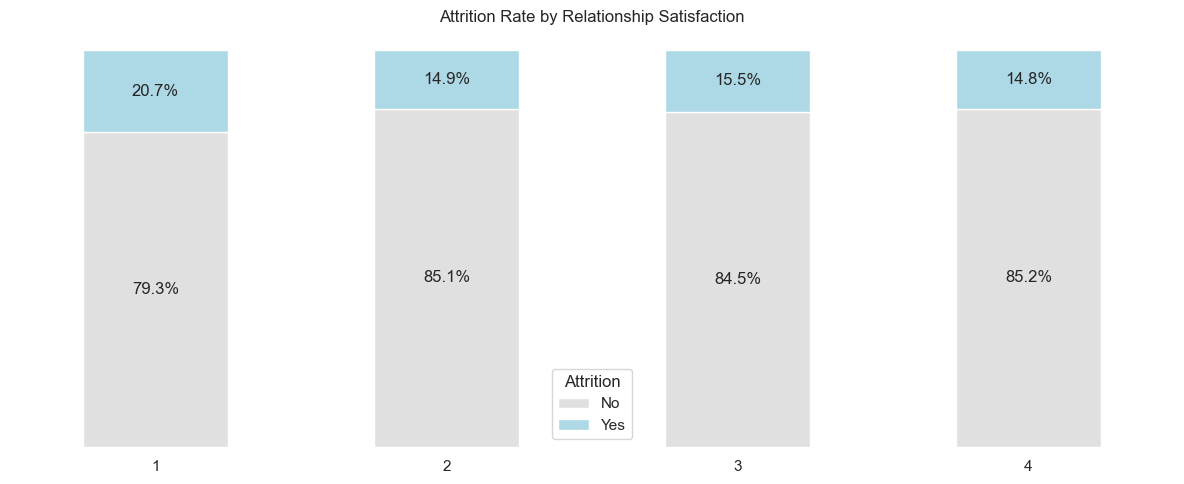

In [280]:
# Calculate counts
count_df = df.groupby(['RelationshipSatisfaction', 'Attrition']).size().unstack(fill_value=0)

# Calculate proportions
proportion_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot stacked bar chart
proportion_df.plot(kind='bar', stacked=True, ax=ax, color=['#E0E0E0', 'lightblue'])

# Set labels and title
ax.set_xlabel('Relationship Satisfaction')
ax.set_ylabel('Proportion (%)')
ax.set_title('Attrition Rate by Relationship Satisfaction')

# Customize x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Display percentages on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Set background color
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Remove y-axis
ax.get_yaxis().set_visible(False)
ax.set_xlabel('')


# Remove chart borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

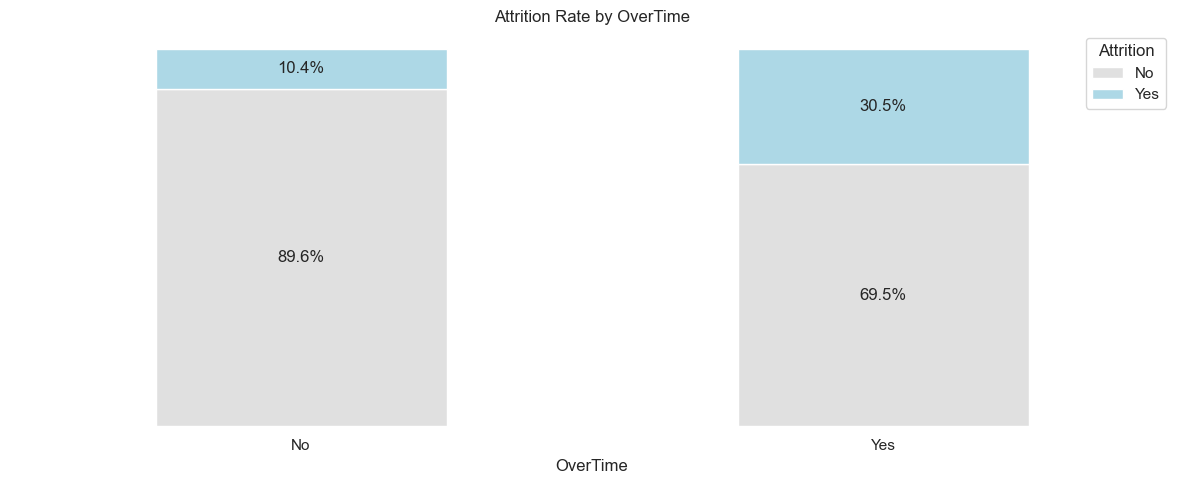

In [284]:
# Calculate counts
count_df = df.groupby(['OverTime', 'Attrition']).size().unstack(fill_value=0)

# Calculate proportions
proportion_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot stacked bar chart
proportion_df.plot(kind='bar', stacked=True, ax=ax, color=['#E0E0E0', 'lightblue'])

# Set labels and title
ax.set_xlabel('OverTime')
ax.set_ylabel('Proportion (%)')
ax.set_title('Attrition Rate by OverTime')

# Customize x-axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Display percentages on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Set background color
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Remove y-axis
ax.get_yaxis().set_visible(False)

# Remove chart borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Correlation between 2 numeric variables (Correlation matrix)

In [325]:
# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

In [327]:
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

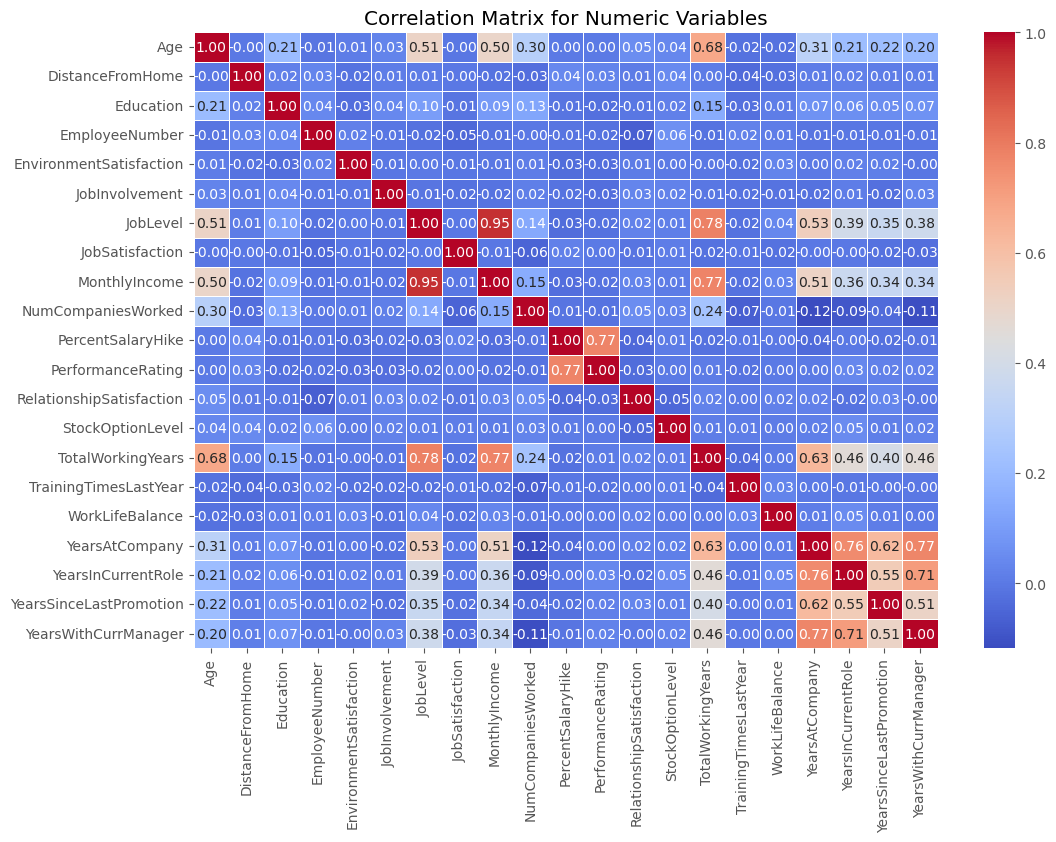

In [329]:
# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

In [ ]:
# Correlation matrix between 2 categorical variables (Correlation matrix)

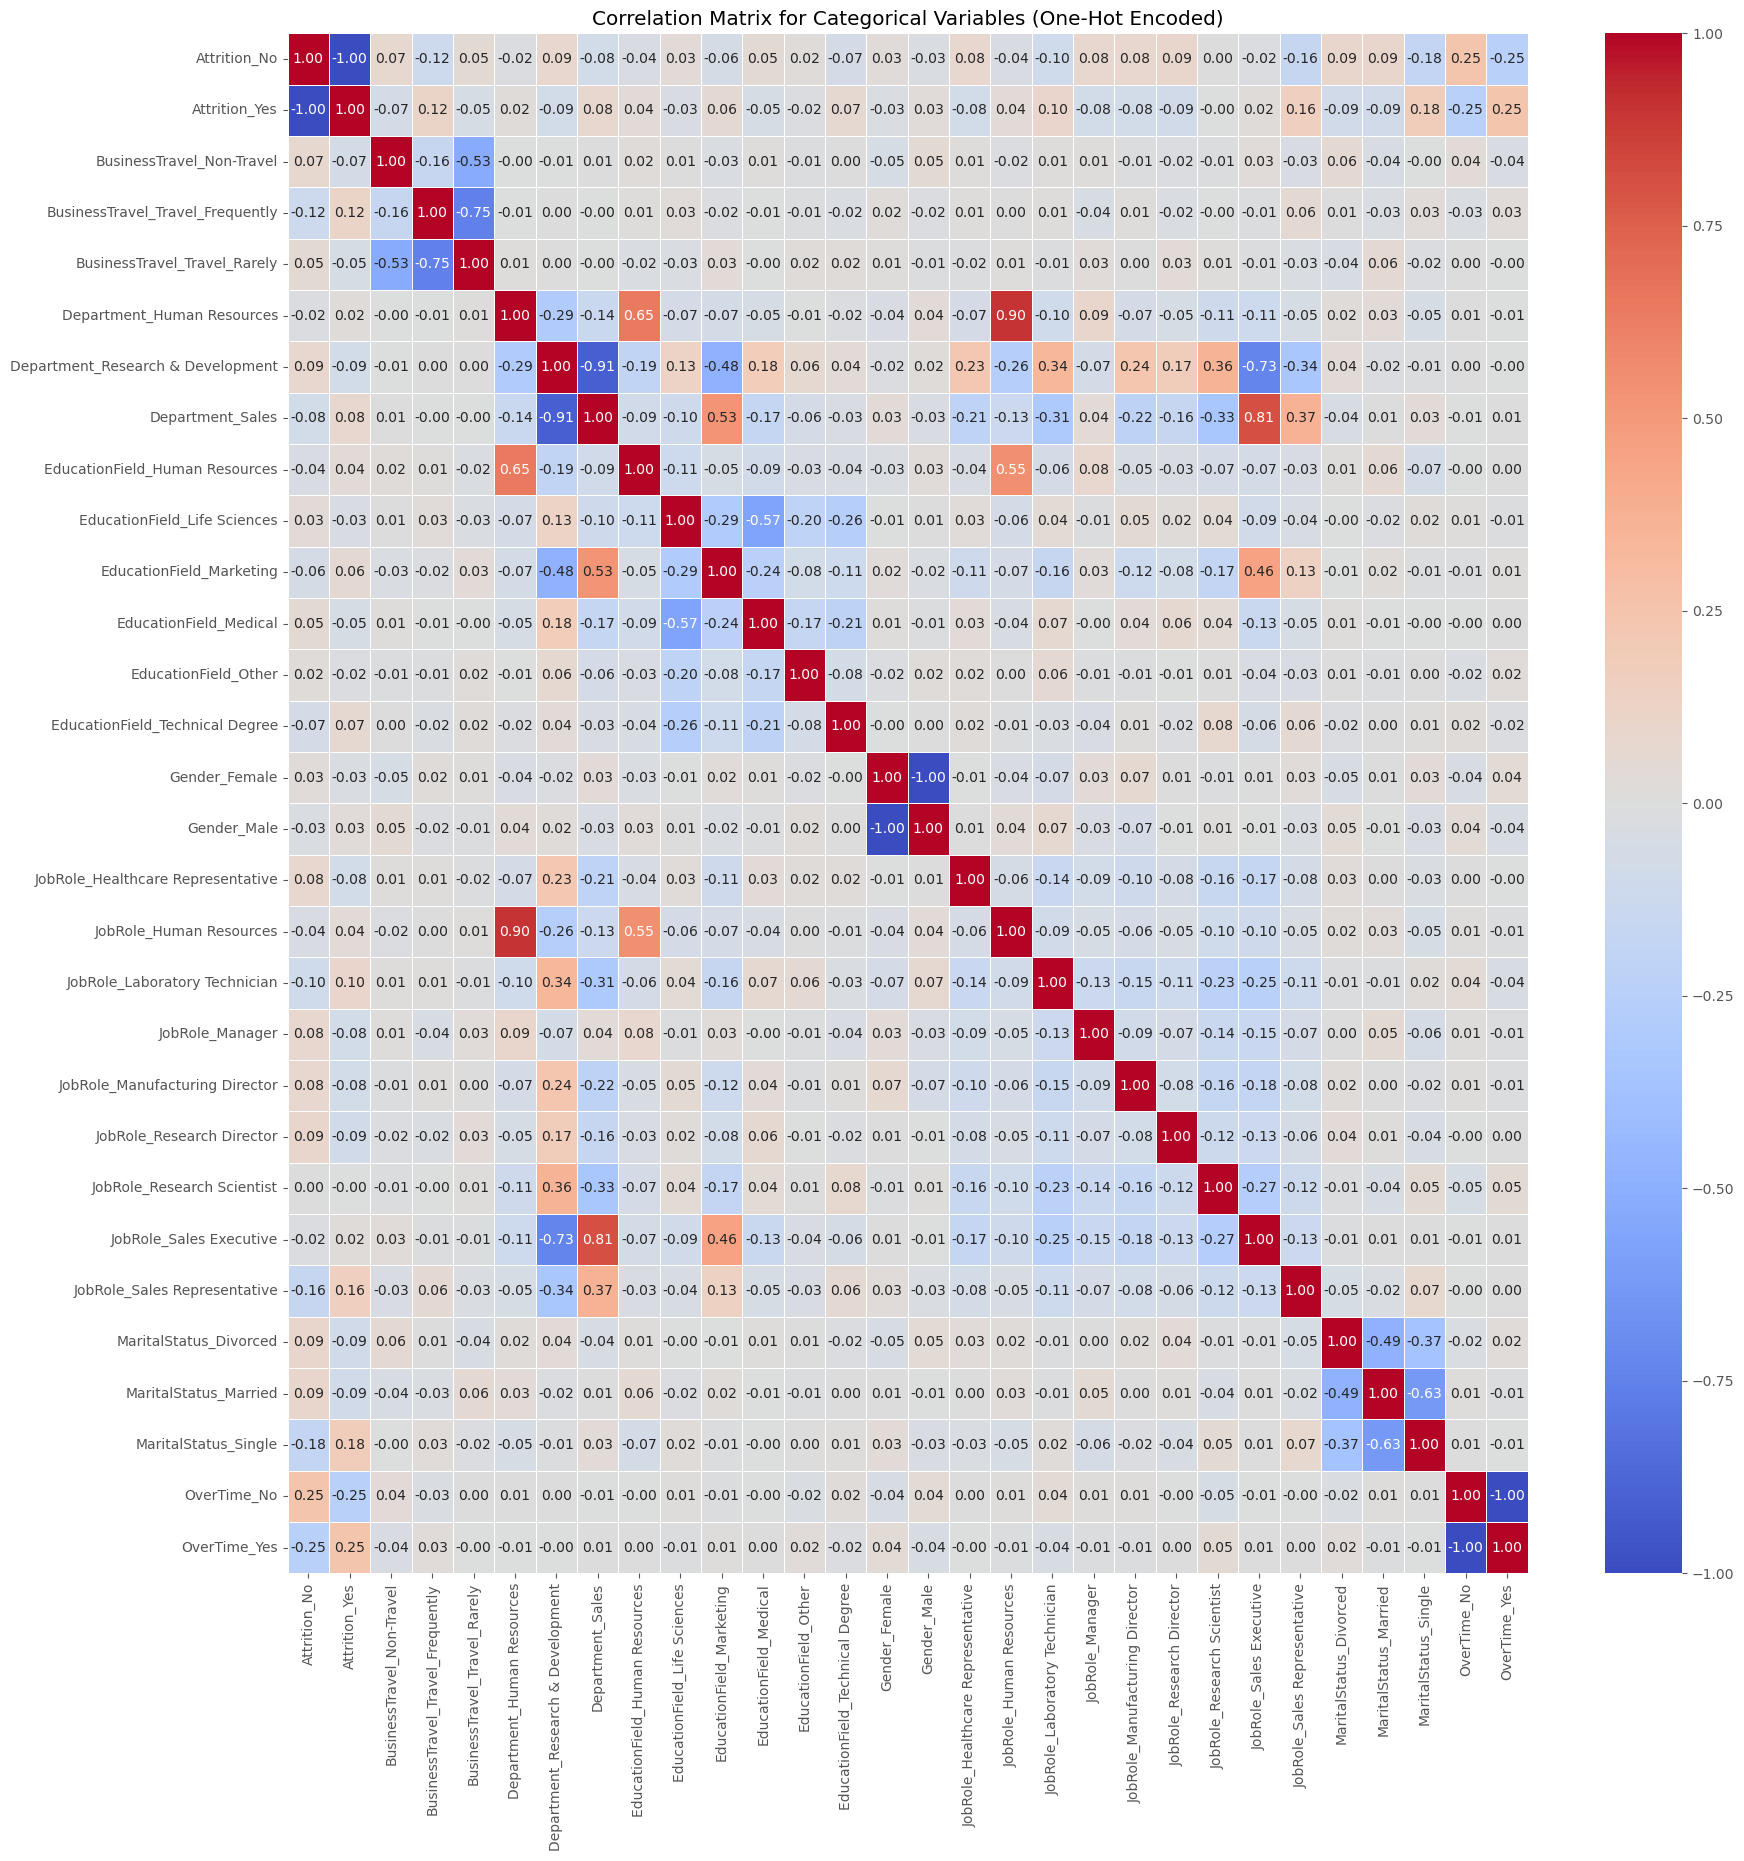

In [331]:
# Convert categorical variables to numeric using one-hot encoding
categorical_df = df.select_dtypes(include=['object'])  # Select only categorical columns
one_hot_encoded_df = pd.get_dummies(categorical_df)

# Calculate the correlation matrix
corr_matrix = one_hot_encoded_df.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Categorical Variables (One-Hot Encoded)')
plt.show()